<a href="https://colab.research.google.com/github/ronmaccms/DE_Team/blob/main/week2/TestSmallData_ANNregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using Artificial Neural Networks

#Numerical regression

in this example we will use Keras to predict wages based on various professional and demographic factors.

In [ ]:
def add(x,y):
  a = x + y
  b = x-y
  c = a + b
  return c


result1 = add(5,3)


In [ ]:
print(result1)


In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load data file
data = pd.read_csv('/content/gdrive/MyDrive/Machine Learning_Datasets for design/DATASET_wages.csv')
pd.options.display.max_columns = None

print(data)

     wage_per_hour  union  education_yrs  experience_yrs  age  female  marr  \
0             5.10      0              8              21   35       1     1   
1             4.95      0              9              42   57       1     1   
2             6.67      0             12               1   19       0     0   
3             4.00      0             12               4   22       0     0   
4             7.50      0             12              17   35       0     1   
..             ...    ...            ...             ...  ...     ...   ...   
529          11.36      0             18               5   29       0     0   
530           6.10      0             12              33   51       1     1   
531          23.25      1             17              25   48       1     1   
532          19.88      1             12              13   31       0     1   
533          15.38      0             16              33   55       0     1   

     south  manufacturing  construction  
0        

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wage_per_hour   534 non-null    float64
 1   union           534 non-null    int64  
 2   education_yrs   534 non-null    int64  
 3   experience_yrs  534 non-null    int64  
 4   age             534 non-null    int64  
 5   female          534 non-null    int64  
 6   marr            534 non-null    int64  
 7   south           534 non-null    int64  
 8   manufacturing   534 non-null    int64  
 9   construction    534 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 41.8 KB
None


In [ ]:
for colname, col in data.items():
  print(colname, "min_val", col.min(), "max_val", col.max())

wage_per_hour min_val 1.0 max_val 44.5
union min_val 0 max_val 1
education_yrs min_val 2 max_val 18
experience_yrs min_val 0 max_val 55
age min_val 18 max_val 64
female min_val 0 max_val 1
marr min_val 0 max_val 1
south min_val 0 max_val 1
manufacturing min_val 0 max_val 1
construction min_val 0 max_val 1


In [ ]:
data.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we can see that some predictors are binary, while others are not

In [ ]:
data_binary = data[["union", "female", "marr", "south", "manufacturing", "construction"]]

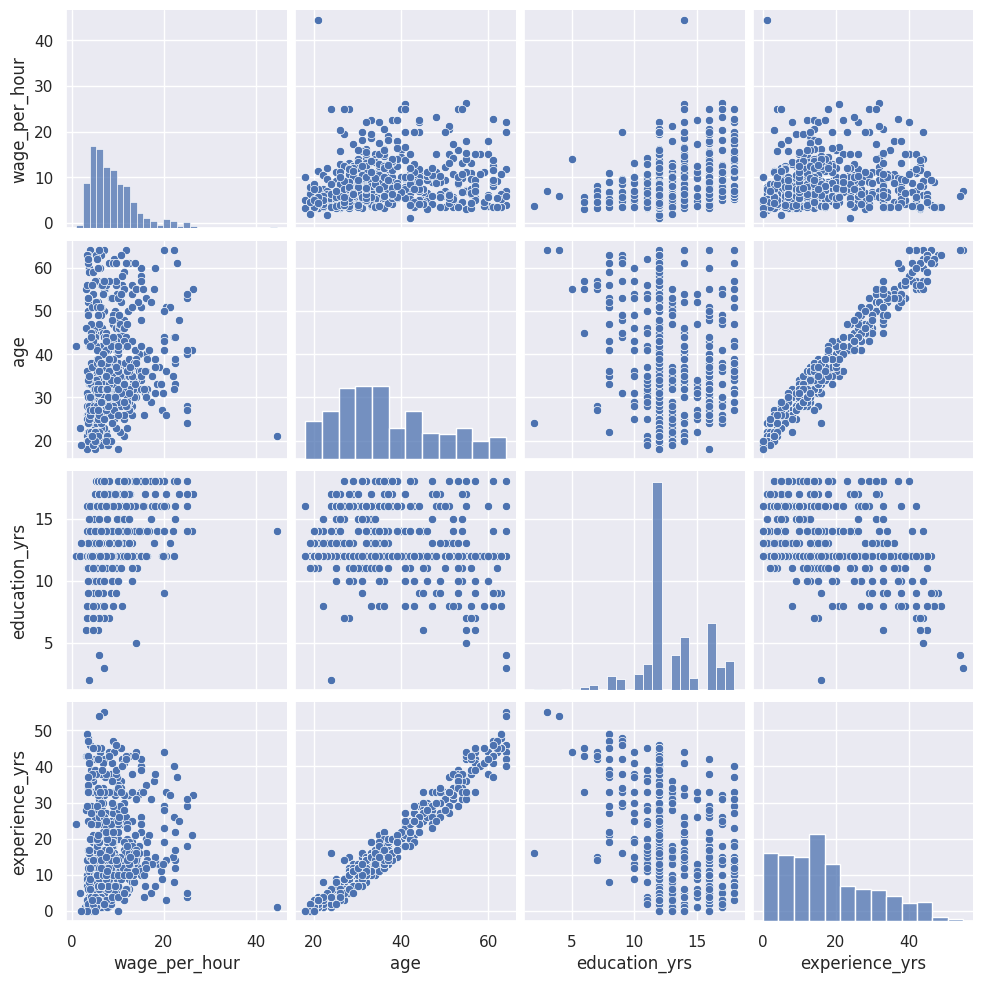

In [ ]:
data_numerical = data[["wage_per_hour", "age", "education_yrs", "experience_yrs"]]
sns.pairplot(data_numerical)

We can see there is a direct relationship between age and experience, but not so much between wage and education, there is a non-linearity

##Prepare Data

**NORMALIZE INPUTS**

In [ ]:
#same code as last time

#declare features
X = data.iloc[:,1:-1]

# Load and instantiate a StandardSclaer
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)

(534, 8)


In [ ]:
#declare regression target
y = data.loc[:,"wage_per_hour"].to_numpy()

y = y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()


#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)


(534, 1)


**SPLIT INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [ ]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)


TRAIN input (427, 8) output (427, 1)
TEST input (107, 8) output (107, 1)


#Build model

From the cheatSheet
Regression between 0 and 1>>
      activation = relu for hidden layers / sigmoid for final layer
      loss = mean squared error
      optimizer = adam
      input from data, is 8 columns
      output is 1 value prediction

In [ ]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]

model.add(tf.keras.layers.Dense(4, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))

# Add a dense layer with 1 value output
model.add(tf.keras.layers.Dense(1, activation= "sigmoid"))

# Compile your model
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Train model

In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=500, validation_split=0.2)

Epoch 1/500
11/11 [==============================] - 1s 16ms/step - loss: 0.0642 - val_loss: 0.0529
Epoch 2/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0598 - val_loss: 0.0492
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0557 - val_loss: 0.0457
Epoch 4/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0516 - val_loss: 0.0425
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0475 - val_loss: 0.0395
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0437 - val_loss: 0.0367
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0402 - val_loss: 0.0342
Epoch 8/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0370 - val_loss: 0.0319
Epoch 9/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0339 - val_loss: 0.0299
Epoch 10/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0312 - val_loss: 0.0282
Epoch 11

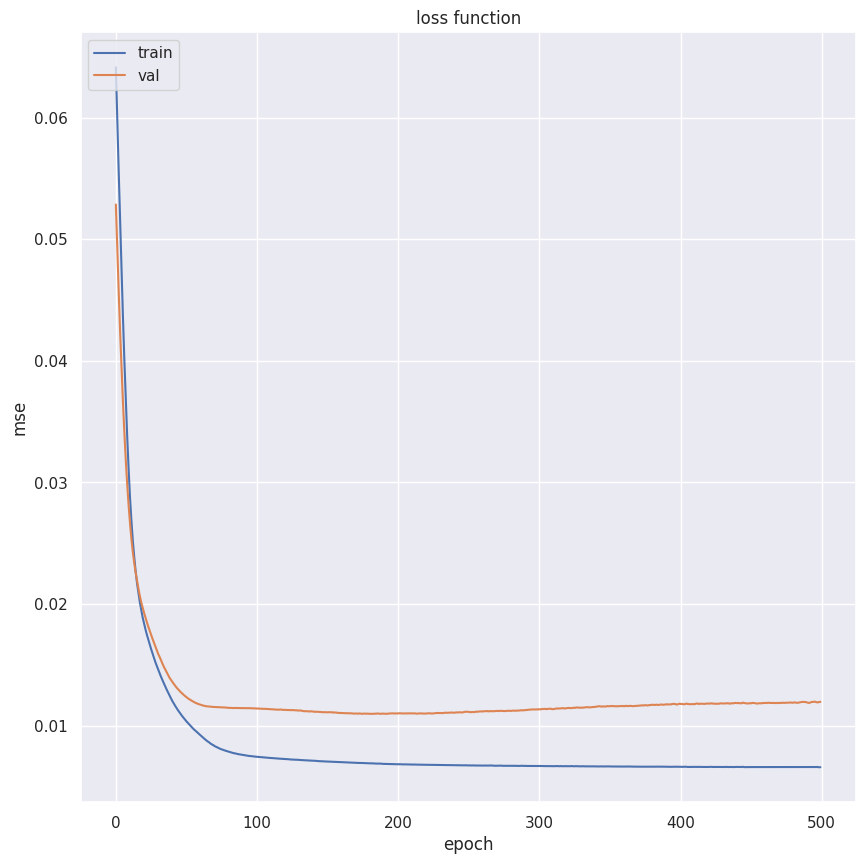

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data



In [ ]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0199
mse_test: 0.019851330667734146


we can see the model is again slightly overfitting, but what does this translate in terms of USD accuracy of our prediction?

#Plot error


In [ ]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

4/4 [==============================] - 0s 2ms/step


(0.0, 40.0)

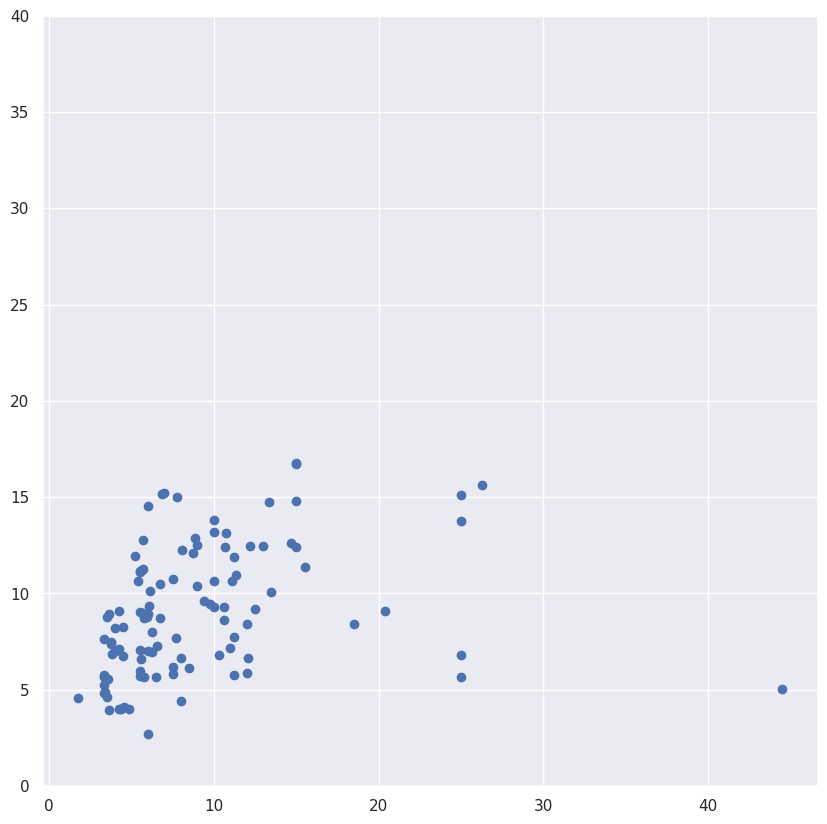

In [ ]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)
plt.ylim(0,40)

[30. 29. 22. 37. 34. 38. 28. 38. 20. 29. 21. 54. 30. 52. 33. 53. 32. 30.
 29. 47. 53. 31. 59. 25. 34. 57. 26. 50. 28. 41. 26. 30. 52. 48. 29. 54.
 60. 32. 56. 34. 31. 30. 25. 29. 42. 28. 36. 41. 43. 20. 37. 50. 25. 30.
 27. 23. 29. 38. 33. 28. 27. 35. 27. 60. 30. 36. 47. 57. 51. 34. 56. 28.
 41. 36. 36. 34. 23. 57. 35. 37. 32. 40. 24. 27. 59. 20. 25. 19. 26. 39.
 32. 38. 40. 21. 47. 18. 42. 25. 62. 49. 55. 26. 28. 25. 27. 31. 34.]


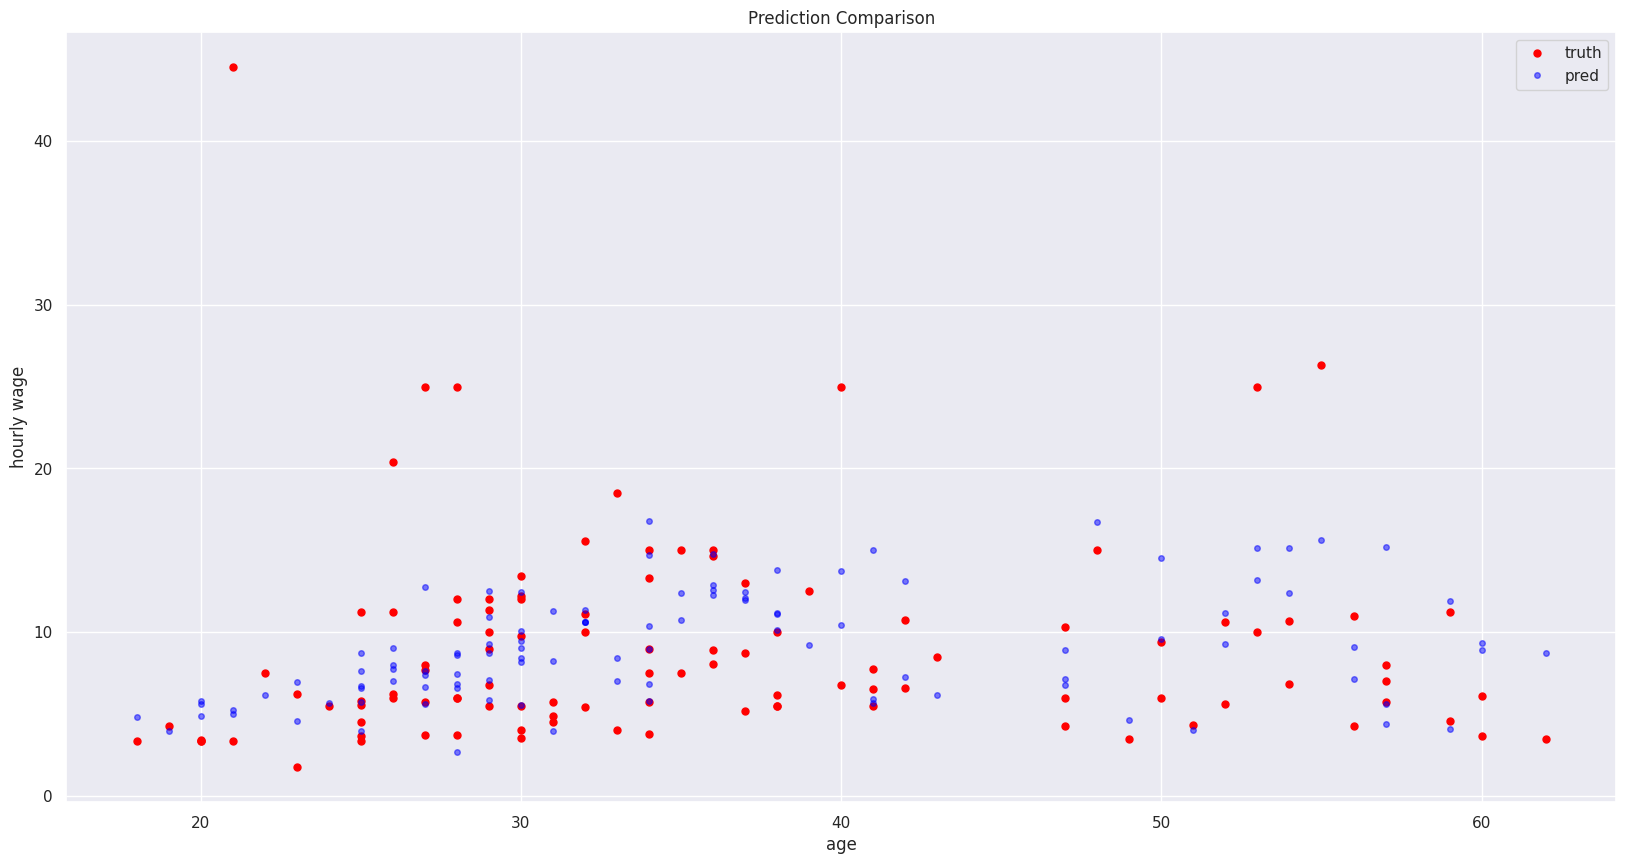

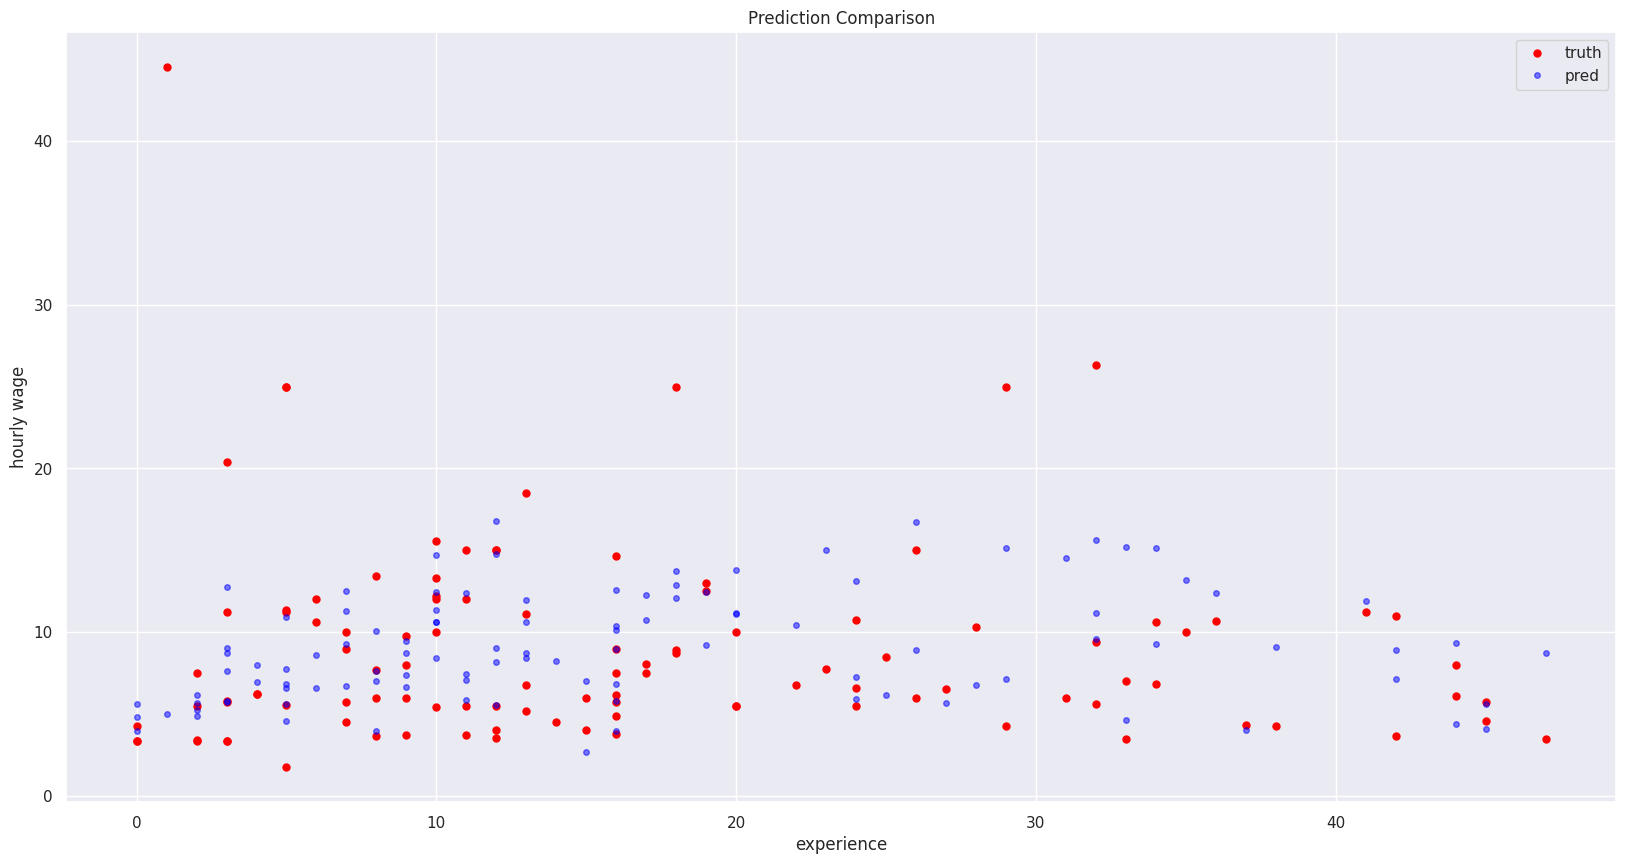

In [ ]:
age_test = (scalerX.inverse_transform(X_test)[:,3])
print(age_test)

exp_test = (scalerX.inverse_transform(X_test)[:,2])

plot_comparison(age_test, y_pred, y_truth, "age", "hourly wage")
plot_comparison(exp_test, y_pred, y_truth,  "experience", "hourly wage")

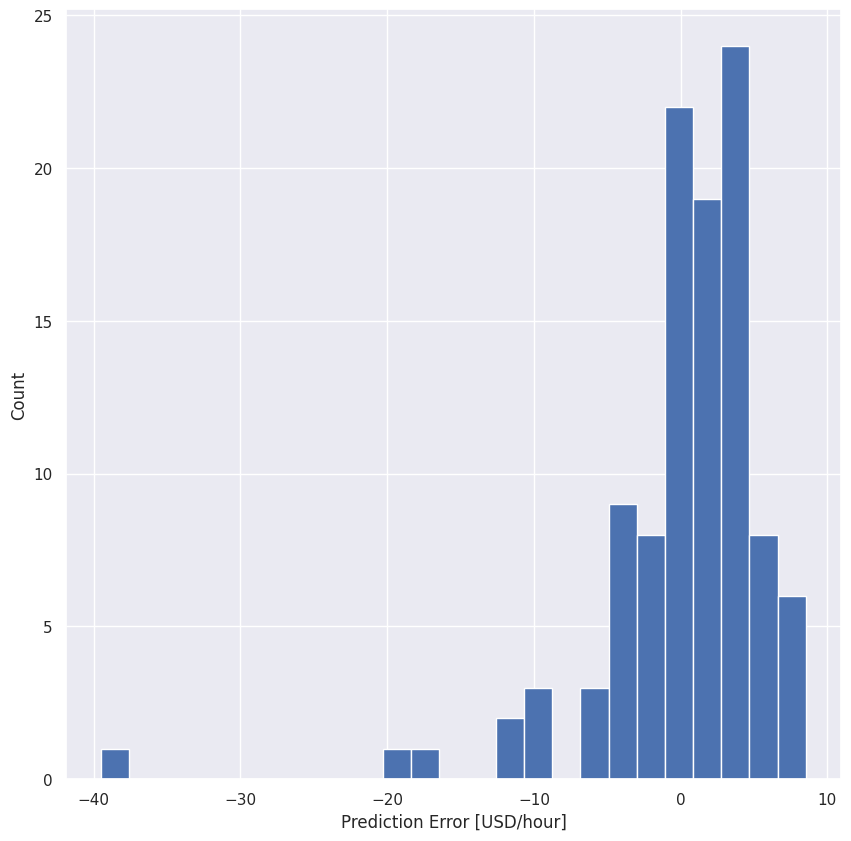

In [ ]:
error = y_pred - y_truth
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [USD/hour]')
_ = plt.ylabel('Count')